In [ ]:
!pip install spectral

     |████████████████████████████████| 184 kB 8.0 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=d11e9ba86f6c6413c43d40de100b6c18217569336b07c9bb7e8ce609015c1235
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
from matplotlib import colors

In [ ]:
img_1984 = tif.imread('RT_LT05_L1TP_232066_19840624_T1_C_w.tif')
img_2020 = tif.imread('RT_LC08_L1TP_232066_20200729_T1_C_w.tif')

In [ ]:
ndvi_1984 = ((img_1984[:,:,3] - img_1984[:,:,2])/(img_1984[:,:,3] + img_1984[:,:,2]))
ndvi_2020 = ((img_2020[:,:,3] - img_2020[:,:,2])/(img_2020[:,:,3] + img_2020[:,:,2]))

In [ ]:
diff = ndvi_2020 - ndvi_1984

In [ ]:
plt.imshow(diff, cmap='hsv_r')

In [ ]:
print("Mínimo: ", np.min(diff))
print("Máximo: ", np.max(diff))
print("Média: ", np.mean(diff))
print("Mediana: ", np.median(diff))
print("Desvio: ", np.std(diff))
print("Variação: ", np.min(diff) - np.max(diff))

Mínimo:  -1.8523278
Máximo:  1.6179421
Média:  -0.068432845
Mediana:  0.026899457
Desvio:  0.23046662
Variação:  -3.47027


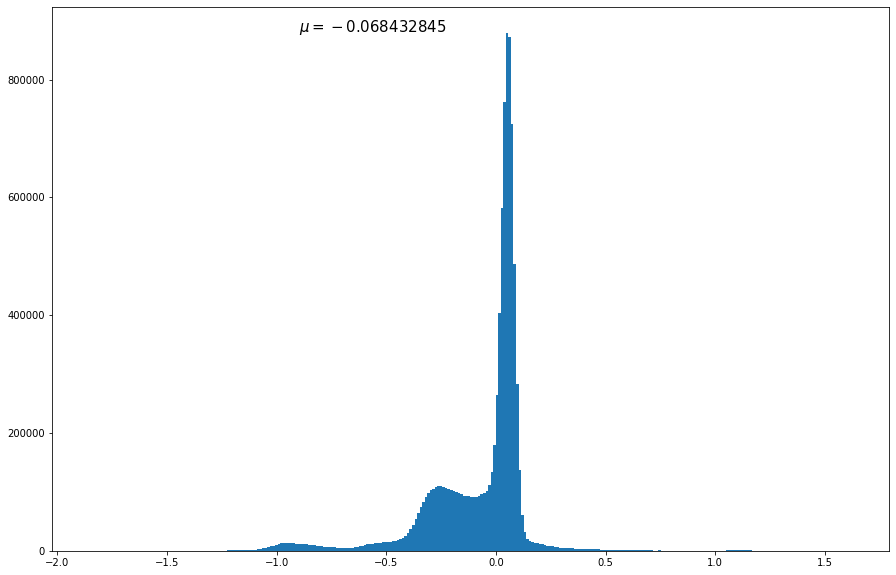

In [ ]:
plt.hist(diff.flatten(), bins=300)
plt.text(-0.9, 880000, r'$\mu = -0.068432845$', fontsize=15)
plt.show()

In [ ]:
meio_desvio_neg = np.median(diff) - 0.5 * np.std(diff)
meio_desvio_pos = np.median(diff) + 0.5 * np.std(diff)

um_desvio_neg = np.median(diff) - np.std(diff)
um_desvio_pos = np.median(diff) + np.std(diff)

dois_desvio_neg = np.median(diff) - 2 * np.std(diff)
dois_desvio_pos = np.median(diff) + 2 * np.std(diff)

In [ ]:
cmap = colors.ListedColormap(['red', 'orange','green','blue'])

bounds=[np.min(diff),meio_desvio_neg,np.mean(diff),meio_desvio_pos,np.max(diff)]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(diff,cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)

In [ ]:
bounds=[np.min(diff),um_desvio_neg,np.mean(diff),um_desvio_pos,np.max(diff)]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(diff,cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)

In [ ]:
bounds=[np.min(diff),dois_desvio_neg,np.mean(diff),dois_desvio_pos,np.max(diff)]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(diff,cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)